In [7]:
import pandas as pd
!pip install seaborn


train = pd.read_csv("train.csv")

train.head()
train.info()


You should consider upgrading via the 'C:\Users\thami\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


     ------------------------------------ 294.9/294.9 KB 191.7 kB/s eta 0:00:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  

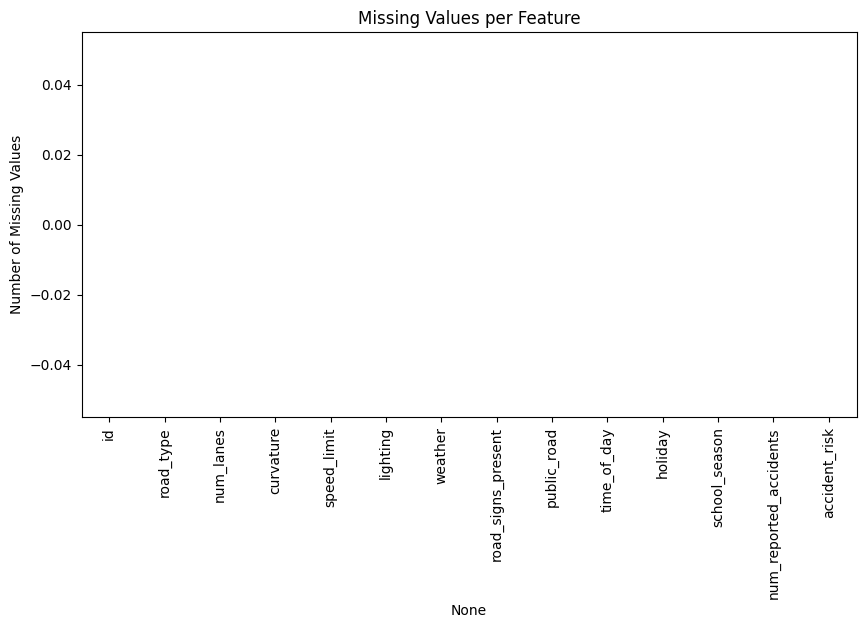

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count missing values per column
missing = train.isnull().sum()

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=missing.index, y=missing.values)

plt.xticks(rotation=90)
plt.ylabel("Number of Missing Values")
plt.title("Missing Values per Feature")

plt.show()




In [9]:
train.describe()

,id,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk
count,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000
mean,258876.500000,2.491511,0.488719,46.112575,1.187970,0.352377
std,149462.849975,1.120434,0.272563,15.788521,0.895961,0.166417
min,0.000000,1.000000,0.000000,25.000000,0.000000,0.000000
25%,129438.250000,1.000000,0.260000,35.000000,1.000000,0.230000
50%,258876.500000,2.000000,0.510000,45.000000,1.000000,0.340000
75%,388314.750000,3.000000,0.710000,60.000000,2.000000,0.460000
max,517753.000000,4.000000,1.000000,70.000000,7.000000,1.000000


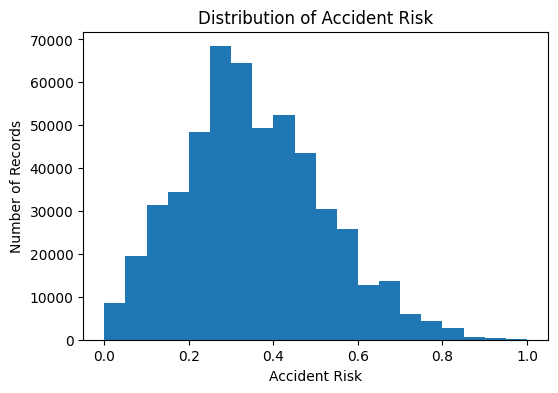

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(train["accident_risk"], bins=20)

plt.xlabel("Accident Risk")
plt.ylabel("Number of Records")
plt.title("Distribution of Accident Risk")

plt.show()


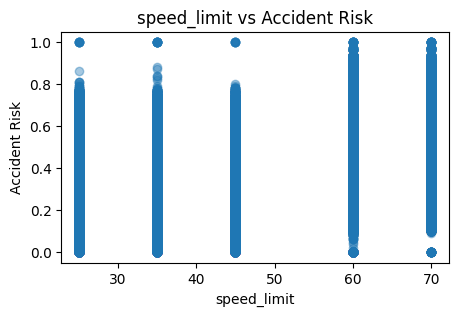

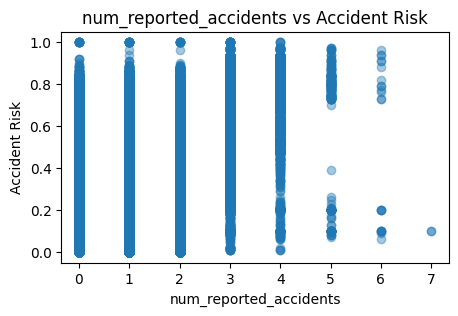

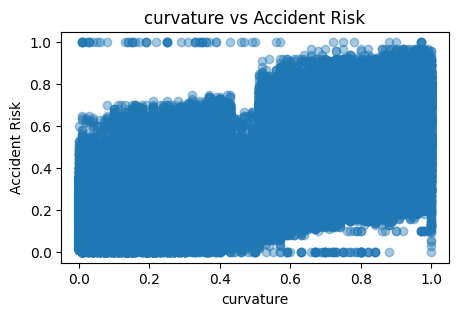

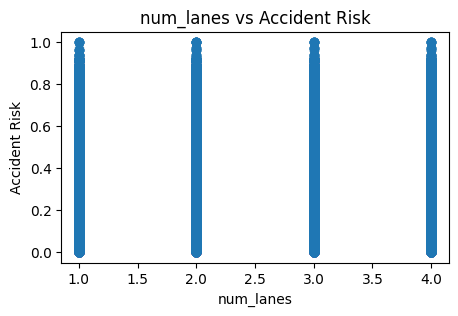

In [11]:
import matplotlib.pyplot as plt

num_cols = [
    "speed_limit",
    "num_reported_accidents",
    "curvature",
    "num_lanes"
]

for col in num_cols:
    plt.figure(figsize=(5,3))
    plt.scatter(train[col], train["accident_risk"], alpha=0.4)
    plt.xlabel(col)
    plt.ylabel("Accident Risk")
    plt.title(f"{col} vs Accident Risk")
    plt.show()


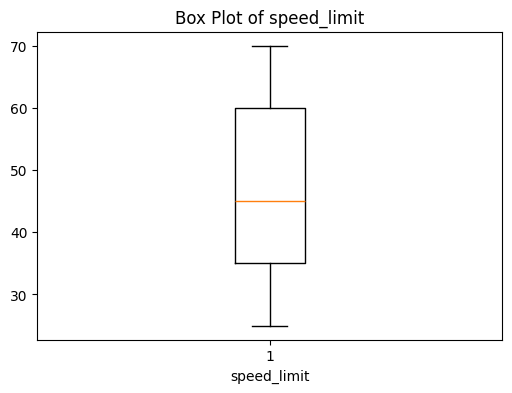

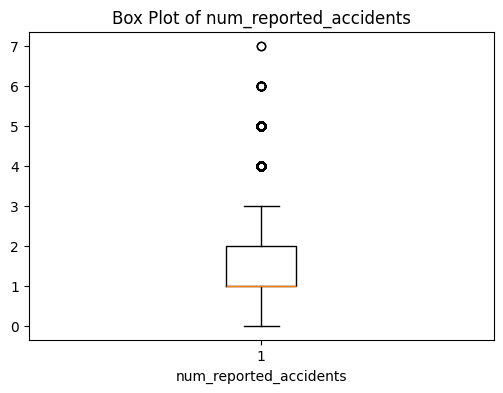

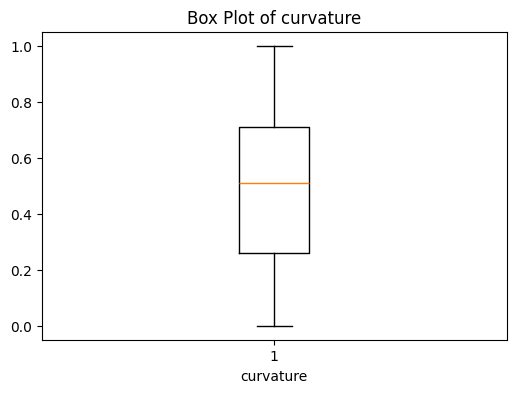

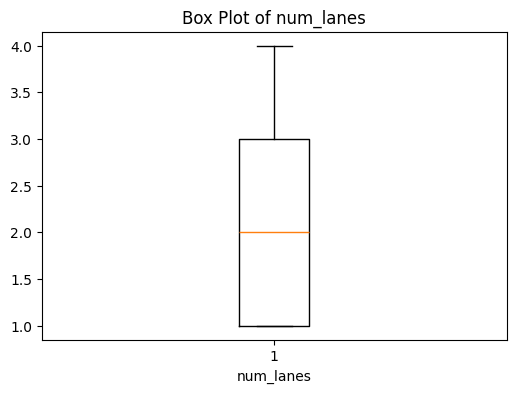

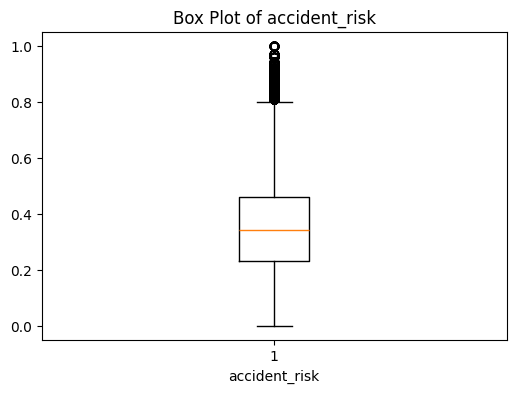

In [16]:
import matplotlib.pyplot as plt

num_cols = [
    "speed_limit",
    "num_reported_accidents",
    "curvature",
    "num_lanes",
    "accident_risk"
]

for col in num_cols[:6]: 
    plt.figure(figsize=(6,4))
    plt.boxplot(x=train[col]) 
    plt.xlabel(col)
    plt.title(f"Box Plot of {col}")
    plt.show()



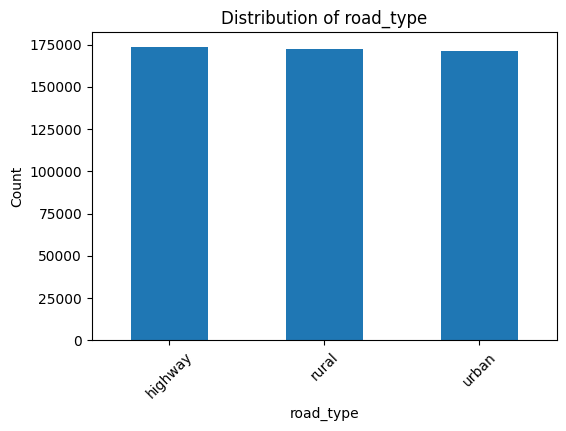

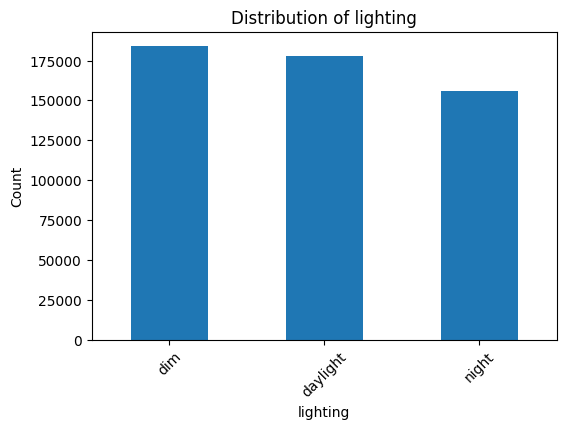

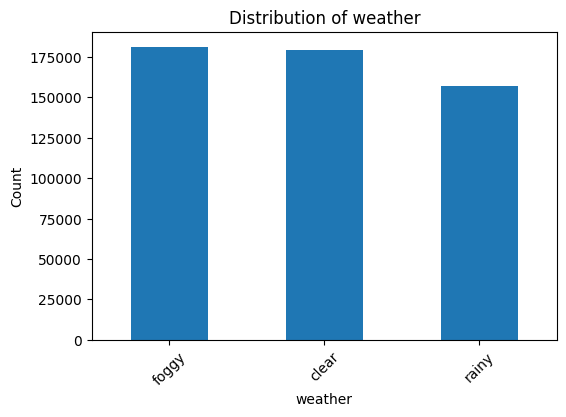

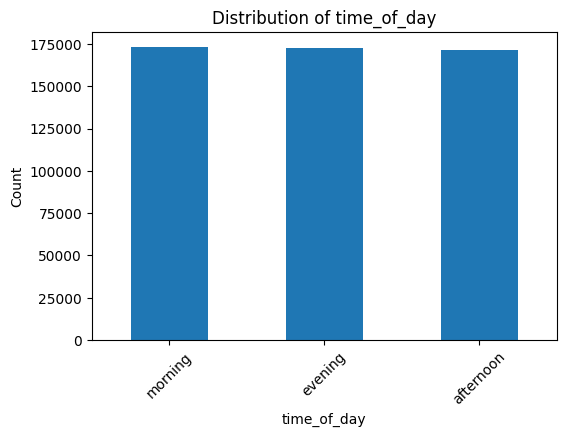

In [17]:

import matplotlib.pyplot as plt

cat_cols = ["road_type", "lighting", "weather", "time_of_day"]

for col in cat_cols:
    plt.figure(figsize=(6,4))
    train[col].value_counts().plot(kind="bar")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


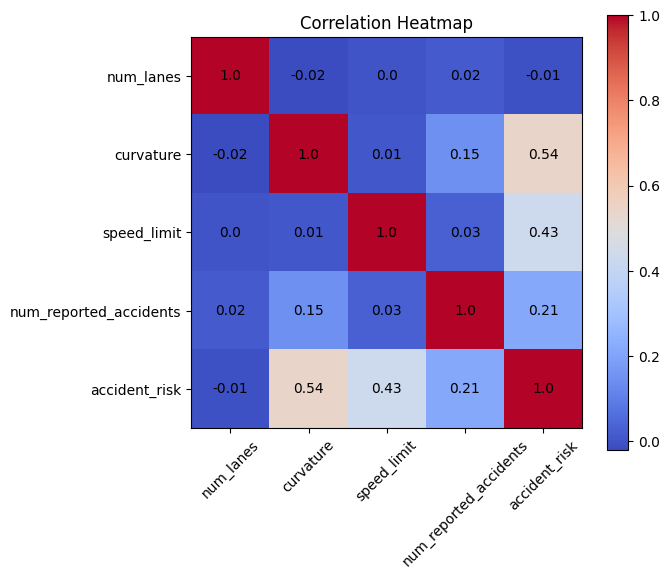

In [18]:
import matplotlib.pyplot as plt
import numpy as np

num_cols = [
    "num_lanes",
    "curvature",
    "speed_limit",
    "num_reported_accidents",
    "accident_risk"
]

corr = train[num_cols].corr()

plt.figure(figsize=(7,6))
plt.imshow(corr, cmap="coolwarm")
plt.colorbar()

plt.xticks(range(len(num_cols)), num_cols, rotation=45)
plt.yticks(range(len(num_cols)), num_cols)

for i in range(len(num_cols)):
    for j in range(len(num_cols)):
        plt.text(j, i, round(corr.iloc[i, j], 2),
                 ha="center", va="center")

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()
